In [389]:
import numpy as np
from matplotlib import pyplot as plt
from prettytable import PrettyTable

np.random.seed(42)

In [390]:
def show_history(history: dict):
    """
    Display the training history in a tabular format.

    Args:
        history (dict): A dictionary containing the training history with keys as column names and values as lists of data points.
    """
    # Create a PrettyTable object to display the history
    table = PrettyTable()

    # Add each key and its corresponding values as a column in the table
    for key in history.keys():
        table.add_column(key, history[key])

    # Print the table
    print(table)

In [391]:
# We will calculte
# x1 - salary, x2-investments return
# y = 0.3* salary + 0.1*investments_return

In [392]:
n_samples = 100


salaries = np.random.rand(n_samples) * 1000 + 100  # 100-1100
investments = np.random.rand(n_samples) * 100 + 10  # 10-110

TARGET_W1 = 0.3
TARGET_W2 = 0.1
TARGET_B = 10

y = (
    (TARGET_W1 * salaries)
    + (TARGET_W2 * investments)
    + TARGET_B
    + np.random.normal(0, 1, n_samples)
)
x1 = salaries
x2 = investments



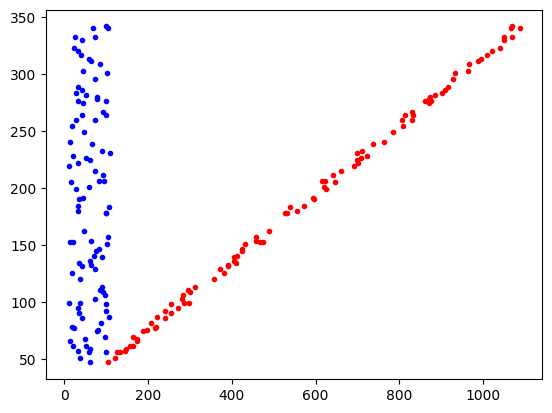

In [393]:
plt.plot(x1, y, "r.")
plt.plot(x2, y, "b.")

In [394]:
# class MomentumOptimizer:
#     def __init__(
#         self,
#         param,
#         lr=0.000_0001,
#         decay_rate=0.02,
#         beta=0.8,
#         max_lr=0.1,
#         min_lr=0.000_0001,
#     ):
#         self.param = param
#         self.lr = lr
#         self.decay_rate = decay_rate
#         self.beta = beta
#         self.momentum = 0
#         self.prev_momentum = 0
#         self.max_lr = max_lr
#         self.min_lr = min_lr

#         self.prev_gradient = None

#     def step(self, gradient, epoch):
#         self.last_gradient = gradient

#         if self.prev_gradient is not None:
#             # absolute value of last gradient should be smaller than absolute value of previous gradient
#             # if not, then the wrong movement, we decrease the lr
#             # this prevents eploiding gradients

#             difference = abs(self.prev_gradient) - abs(self.last_gradient)
#             if difference > 0:  # all good
#                 self.lr = self.lr * (1.0 + self.decay_rate)
#             elif difference < 0:
#                 self.lr = self.lr * (1.0 - self.decay_rate)

#         if self.lr > self.max_lr:
#             self.lr = self.max_lr
#         elif self.lr < self.min_lr:
#             self.lr = self.min_lr

#         self.prev_momentum = self.momentum
#         self.momentum = self.beta * self.prev_momentum + self.lr * gradient
#         self.param -= self.momentum

#         self.prev_gradient = gradient

#     def get_param(self):
#         return self.param


# w1, w2, b = np.random.rand(3) + 2
# w1_Optimizer = MomentumOptimizer(w1, lr=0.000_001, decay_rate=0.1)
# w2_Optimizer = MomentumOptimizer(w2, lr=0.000_001, decay_rate=0.1)
# b_Optimizer = MomentumOptimizer(b, lr=0.1)

In [ ]:
class MomentumOptimizer:
    def __init__(
        self,
        param,
        beta=0.95,
    ):
        self.param = param
        self.beta_m = 0.9
        self.beta_v = 0.999
        self.momentum = 0
        self.prev_momentum = 0
        self.lr = 0.01
        self.v = 0
        self.prev_v = 0

    def step(self, gradient, epoch):
        self.prev_momentum = self.momentum
        self.prev_v = self.v

        # calculate the moving average of the momentum and the squared gradients
        self.momentum = (self.beta_m * self.prev_momentum) + (
            1 - self.beta_m
        ) * gradient
        self.v = (self.beta_v * self.prev_v) + (1 - self.beta_v) * (gradient**2)

        # bias correction
        # IMPORTATNT: We create new variables and do not modify the original ones
        # This is because we need to use the original values for the next iteration
        # But update the param with the corrected values.
        momentum_hat = self.momentum / (1 - self.beta_m ** (epoch + 1))
        v_hat = self.v / (1 - self.beta_v ** (epoch + 1))
        

        learning_rate = self.lr / (np.sqrt(v_hat) + 1e-8)
        self.param -= learning_rate * momentum_hat

    def get_param(self):
        return self.param


w1, w2, b = np.random.rand(3) + 2
w1_Optimizer = MomentumOptimizer(w1)
w2_Optimizer = MomentumOptimizer(w2)
b_Optimizer = MomentumOptimizer(b)

In [396]:
epoch = 0
history = {
    "epoch": [],
    "loss": [],
    "w1_gradient": [],
    "w2_gradient": [],
    "w1": [],
    "w2": [],
    # "w1_lr": [],
    # "w2_lr": [],
}
while True:

    w1 = w1_Optimizer.get_param()
    w2 = w2_Optimizer.get_param()
    b = b_Optimizer.get_param()

    y_pred = w1 * x1 + w2 * x2 + b
    errors = y_pred - y

    loss = np.mean(np.abs(errors))
    if epoch > 1000:
        break
    print(loss)

    w1_gradient = (2 / len(x1)) * np.sum(errors * x1)
    w2_gradient = (2 / len(x2)) * np.sum(errors * x2)
    b_gradient = (2 / len(x1)) * np.sum(errors)
    
    w1_gradient = np.round(w1_gradient,3)
    w2_gradient = np.round(w2_gradient,3)
    b_gradient = np.round(b_gradient,3)
    
    # print(f"Gradient w1: {w1_gradient}, Gradient w2: {w2_gradient}")
    

    w1_Optimizer.step(w1_gradient, epoch)
    w2_Optimizer.step(w2_gradient, epoch)
    b_Optimizer.step(b_gradient, epoch)

    history["epoch"].append(epoch)
    history["loss"].append(float(f"{loss:.3f}"))
    history["w1_gradient"].append(w1_gradient)
    history["w2_gradient"].append(w2_gradient)
    history["w1"].append(float(f"{w1:.3f}"))
    history["w2"].append(float(f"{w2:.3f}"))
    # history["w1_lr"].append(f"{w1_Optimizer.lr:.7f}")
    # history["w2_lr"].append(f"{b_Optimizer.lr:.7f}")
    epoch += 1

1663.9012258616513
1657.5915867047142
1651.2825829968074
1644.9746400054678
1638.6681830114364
1632.3636363461803
1626.0614224452986
1619.761960923669
1613.4656676809034
1607.1729540419626
1600.8842259396597
1594.5998831439015
1588.320318541581
1582.0459174724963
1575.7770571222875
1569.514105975897
1563.2574233326127
1557.0073588833793
1550.7642523513816
1544.5284331938767
1538.3002203649621
1532.0799221370232
1525.8678359789722
1519.6642484883105
1513.4694353753605
1507.2836614932319
1501.107180914245
1494.9402370449877
1488.7830627790436
1482.6358806833473
1476.4989032127094
1470.3723329507213
1464.256362872093
1458.1511766240092
1452.0569488219612
1445.9738453584673
1439.9020237202762
1433.8416333124271
1427.7928157862846
1421.7557053684054
1415.7304291905646
1409.7171076154636
1403.7158545606621
1397.7267778158034
1391.7499793535926
1385.7855556338868
1379.8335978987245
1373.894192458221
1367.9674209667573
1362.0533606888255
1356.1520847552665
1350.2636624077495
1344.3881592336727

In [397]:
# show_history(history)

3.6243033554560418


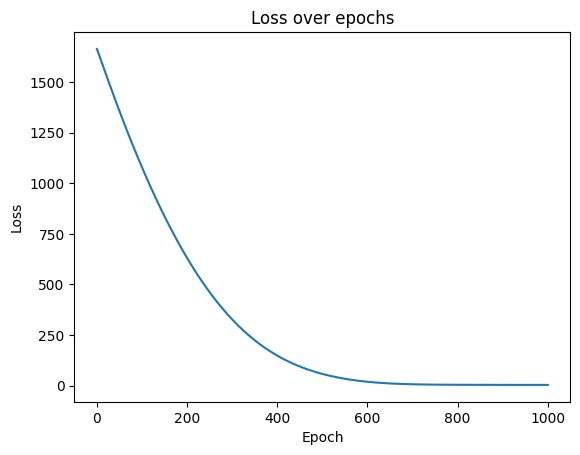

In [398]:
# Plot the loss over the epochs
print(loss)
plt.plot(history["epoch"], history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.show()


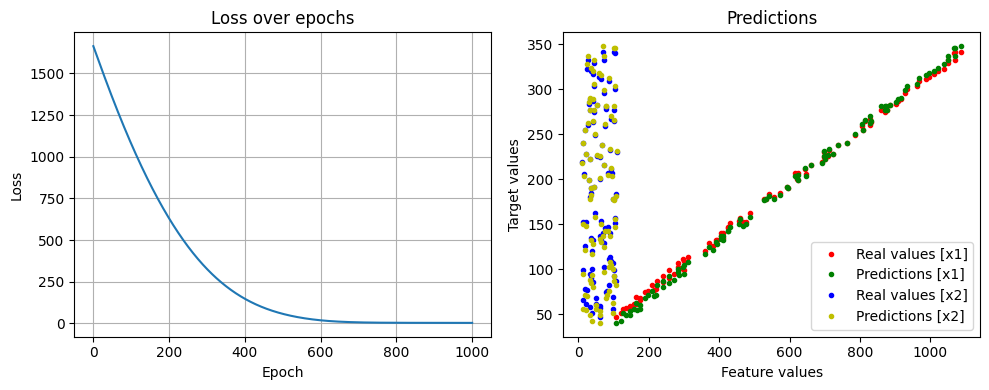

In [399]:
w1 = w1_Optimizer.get_param()
w2 = w2_Optimizer.get_param()
b = b_Optimizer.get_param()

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[1].plot(x1, y, "r.", label="Real values [x1]")
ax[1].plot(x1, w1 * x1 + w2 * x2 + b, "g.", label="Predictions [x1]")
ax[1].plot(x2, y, "b.", label="Real values [x2]")
ax[1].plot(x2, w1 * x1 + w2 * x2 + b, "y.", label="Predictions [x2]")
ax[1].set_title("Predictions")
ax[1].set_xlabel("Feature values")
ax[1].set_ylabel("Target values")
ax[1].legend()

ax[0].plot(history["epoch"], history["loss"])
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss over epochs")
ax[0].grid()

plt.tight_layout()

# plt.plot(x1, y, "r.")
# plt.plot(x2, y, "b.")
# plt.plot(x1, w1 * x1 + w2 * x2 + b, "g.")
# plt.plot(x2, w1 * x1 + w2 * x2 + b, "y.")
plt.show()